<a href="https://colab.research.google.com/github/yanwe1/PGSS2023/blob/main/Copy_of_CodeInterpreter_ChatGPT_IRIS_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data in from Google Drive

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
import pandas as pd

# Reload the CSV file into a DataFrame with correct column names
iris_df = pd.read_csv('/content/gdrive/MyDrive/PGSS 2023/PGSS2023/Week01/iris.csv',
                      names=["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"])

# Display the first few rows of the DataFrame
iris_df.head()

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [32]:
# Display basic statistics
basic_stats = iris_df.describe(include='all')

# Count the number of instances for each species
species_counts = iris_df["Species"].value_counts()

basic_stats, species_counts

(        Petal.Length  Petal.Width  Sepal.Length  Sepal.Width      Species
 count     150.000000   150.000000    150.000000   150.000000          150
 unique           NaN          NaN           NaN          NaN            3
 top              NaN          NaN           NaN          NaN  Iris-setosa
 freq             NaN          NaN           NaN          NaN           50
 mean        5.843333     3.054000      3.758667     1.198667          NaN
 std         0.828066     0.433594      1.764420     0.763161          NaN
 min         4.300000     2.000000      1.000000     0.100000          NaN
 25%         5.100000     2.800000      1.600000     0.300000          NaN
 50%         5.800000     3.000000      4.350000     1.300000          NaN
 75%         6.400000     3.300000      5.100000     1.800000          NaN
 max         7.900000     4.400000      6.900000     2.500000          NaN,
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

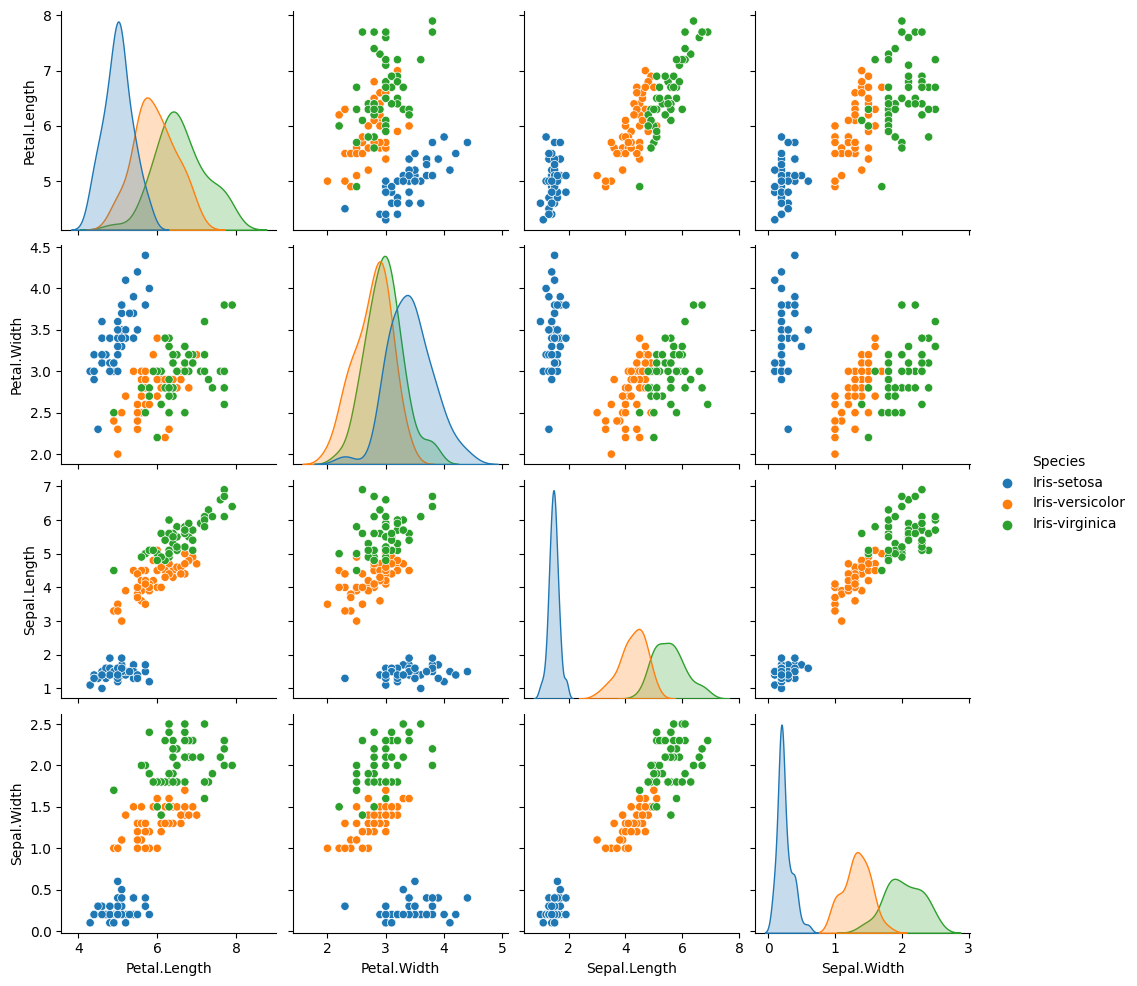

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot to visualize the distributions and relationships between different features for each species
sns.pairplot(iris_df, hue="Species")
plt.show()

# Hypothesis Exploration using Statistical Testing , for Petal Length

In [34]:
# Explore Petal Length Hypothesis: The average petal length differs significantly between the species.
# import statsmodels.api         as sm
# from statsmodels.formula.api   import ols
# mod_f_t = ols(formula='Petal.Length ~ Sepal.Width + Sepal.Length + Petal.Width + Species', data = iris_df)
# res_f_t = mod_f_t.fit()
# print(res_f_t.summary())

import pandas as pd
from scipy.stats import shapiro, levene, f_oneway

# Load the CSV file into a DataFrame
# iris_df = pd.read_csv('iris.csv', names=["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"])

# Check normality
_, p_shapiro_setosa = shapiro(iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'])
_, p_shapiro_versicolor = shapiro(iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'])
_, p_shapiro_virginica = shapiro(iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length'])


# Log transform the continuous variable to help ensure homoscedacticity
import numpy as np
iris_df['Petal.Length.Log'] = np.log(iris_df['Petal.Length'])

# Check homogeneity of variances
_, p_levene = levene(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

# Perform ANOVA
_, p_anova = f_oneway(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

p_shapiro_setosa, p_shapiro_versicolor, p_shapiro_virginica, p_levene, p_anova


(0.4595010578632355,
 0.4647378921508789,
 0.25831347703933716,
 0.0022585277836218586,
 1.6696691907693826e-31)

In [35]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each pair of species
_, p_mannwhitneyu_setosa_versicolor = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length']
)

_, p_mannwhitneyu_setosa_virginica = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

_, p_mannwhitneyu_versicolor_virginica = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

p_mannwhitneyu_setosa_versicolor, p_mannwhitneyu_setosa_virginica, p_mannwhitneyu_versicolor_virginica


(8.34582714594069e-14, 6.396699069396538e-17, 5.869006410664197e-07)

# Lets try and see how often we are correct at classifying Species using this statistically significant differentiator of species

In [36]:
# Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Petal.Length']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
# Use dtreeviz to visualize the decision rules embodied by entropyClf

In [38]:
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7333333333333333


In [39]:
# !pip install dtreeviz

In [40]:
# from dtreeviz.trees import *

# viz = dtreeviz(entropyClf,
#                 x_train,
#                 y_train,
#                 target_name='Species',
#                 feature_names=x.columns,
#                 class_names=list(labelencoder.classes_)
#                 )

# viz.view()


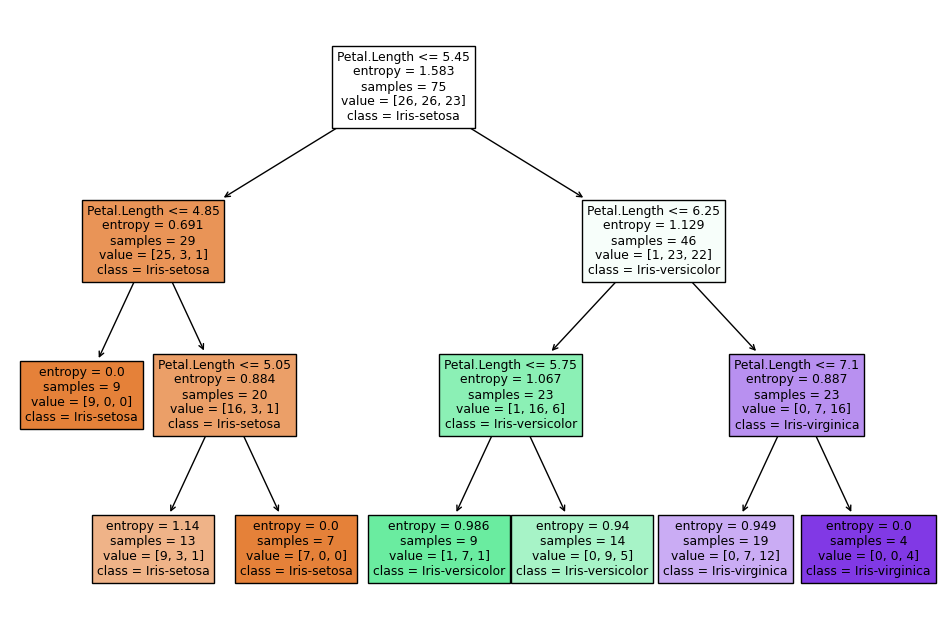

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Petal.Length'], class_names=labelencoder.classes_)
plt.show()

In [42]:
# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

mean_accuracy


0.72

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       0.87      0.90      0.88        50
Iris-versicolor       0.64      0.46      0.53        50
 Iris-virginica       0.65      0.80      0.71        50

       accuracy                           0.72       150
      macro avg       0.72      0.72      0.71       150
   weighted avg       0.72      0.72      0.71       150



# Explore what this classification 5-fold CV report looks like for the other 3 continuous dependent variables for the Species response

In [44]:
# Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Petal.Width']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       0.71      0.64      0.67        50
Iris-versicolor       0.56      0.54      0.55        50
 Iris-virginica       0.37      0.42      0.39        50

       accuracy                           0.53       150
      macro avg       0.55      0.53      0.54       150
   weighted avg       0.55      0.53      0.54       150



In [45]:
#Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Sepal.Width']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.90      0.92      0.91        50
 Iris-virginica       0.92      0.90      0.91        50

       accuracy                           0.94       150
      macro avg       0.94      0.94      0.94       150
   weighted avg       0.94      0.94      0.94       150



In [46]:
# Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Sepal.Length']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.88      0.92        50
 Iris-virginica       0.89      0.96      0.92        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



# Explore what the report looks like if you use ALL 4 as dependent variables predicting the Species Response

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

x = iris_df[['Petal.Length','Petal.Width', 'Sepal.Length','Sepal.Width']]
y = iris_df['Species']

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.92      0.94        50
 Iris-virginica       0.92      0.96      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [48]:
entropyClf.feature_importances_

array([0.02328124, 0.        , 0.90989625, 0.06682251])

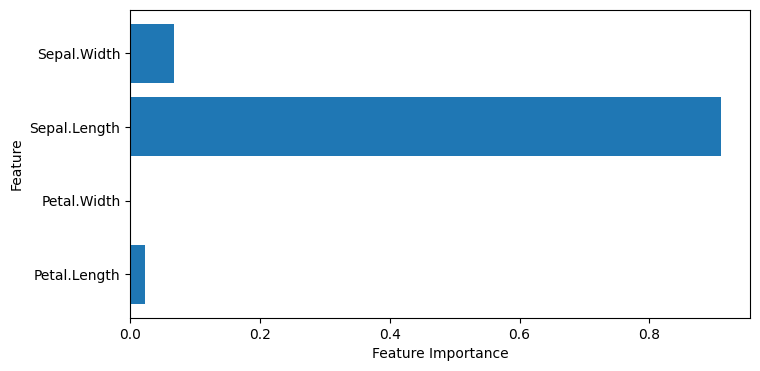

In [49]:
# Plot the variable importances corresponding
# to entropyClf as a bar plot
import numpy as np
n_features = x.shape[1]
plt.figure(figsize=(8,4))
plt.barh(range(n_features), entropyClf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
irisdf = pd.DataFrame(iris.data)


irisdf.columns = iris.feature_names

irisdf['Species'] = iris.target

irisdf


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
irisdf['Species'][irisdf['Species']==0] = iris.target_names[0]
irisdf['Species'][irisdf['Species']==1] = iris.target_names[1]
irisdf['Species'][irisdf['Species']==2] = iris.target_names[2]

irisdf

<ipython-input-52-1ba33ffb112c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisdf['Species'][irisdf['Species']==0] = iris.target_names[0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
